Some of the basic questions need to be asked

Q1: Who were the passengers?
Q2: What deck were the passengers on?
Q3: Where did the passengers come from?
Q4: Who were with the family?

The Final question is 
What factors helped the survivors?

train.csv file was downloaded from the Kaggle website

url = https://www.kaggle.com

In [3]:
titanic_dframe = pd.read_csv('train.csv')

In [8]:
titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Answering Question 1 
Who were the passengers on the Titanic

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


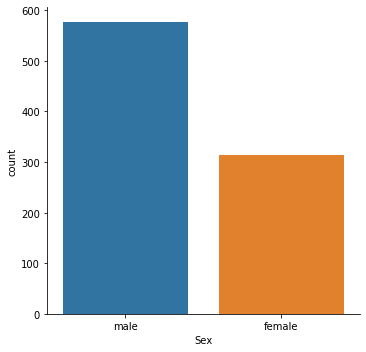

In [17]:
sns.catplot('Sex',data=titanic_dframe,kind='count')

Shows that we have higher number of males as compared to the females

In [18]:
# Lets separate the gender by classess

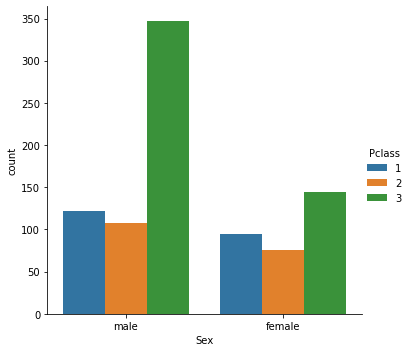

In [20]:
sns.catplot('Sex',data=titanic_dframe,hue='Pclass',kind='count')

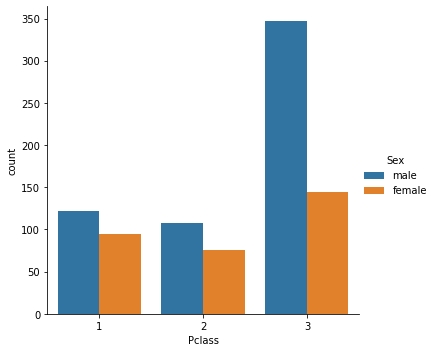

In [21]:
sns.catplot('Pclass',data=titanic_dframe,hue='Sex',kind='count')

In [23]:
def male_female_child(passenger):
    age,Sex, = passenger
    if age < 16:
        return 'child'
    else:
        return Sex 

In [25]:
titanic_dframe['Person']=titanic_dframe[['Age','Sex']].apply(male_female_child,axis=1)

In [26]:
titanic_dframe[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


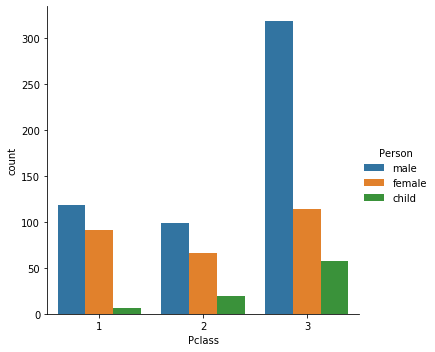

In [27]:
sns.catplot('Pclass',data=titanic_dframe,kind='count',hue='Person') #Child in each class

In [28]:
#Distribution of ages

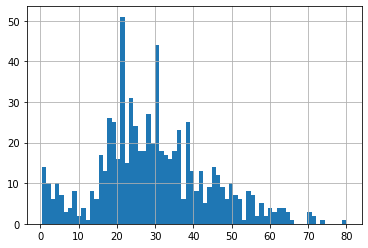

In [29]:
titanic_dframe['Age'].hist(bins=70)

In [30]:
titanic_dframe['Age'].mean() # Mean of the age

29.69911764705882

In [31]:
#Value counts

In [32]:
titanic_dframe['Person'].value_counts() # Number of males and Females in titanic

male      537
female    271
child      83
Name: Person, dtype: int64

In [33]:
titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


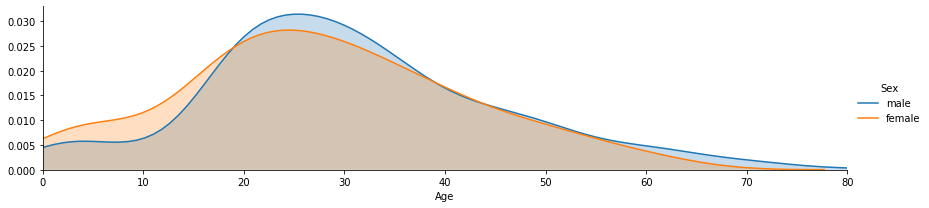

In [34]:
fig = sns.FacetGrid(titanic_dframe,hue='Sex',aspect=4)
fig.map (sns.kdeplot,'Age',shade=True)
oldest = titanic_dframe['Age'].max()
x_min = 0
x_max = oldest

fig.set(xlim = (x_min,x_max))
fig.add_legend()

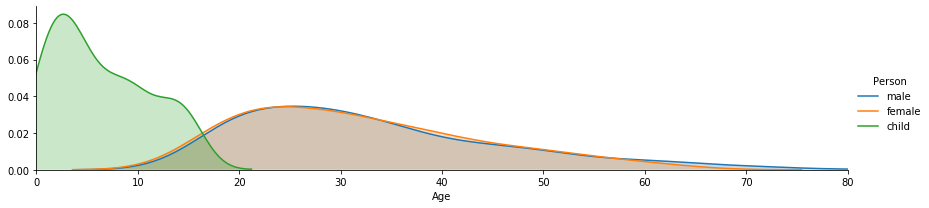

In [35]:
fig = sns.FacetGrid(titanic_dframe,hue='Person',aspect=4)
fig.map (sns.kdeplot,'Age',shade=True)
oldest = titanic_dframe['Age'].max()
x_min = 0
x_max = oldest

fig.set(xlim = (x_min,x_max))
fig.add_legend()

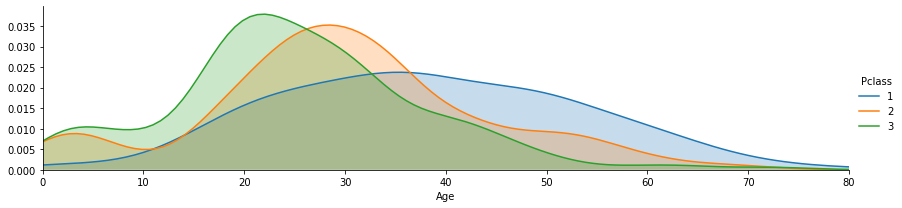

In [36]:
fig = sns.FacetGrid(titanic_dframe,hue='Pclass',aspect=4)
fig.map (sns.kdeplot,'Age',shade=True)
oldest = titanic_dframe['Age'].max()
x_min = 0
x_max = oldest

fig.set(xlim = (x_min,x_max))
fig.add_legend()

Based on the above analysis we can see that most of the males are in the third class. Also we checked the number 
of children on board as well by the age threshold limit of 16.  Mean of age is around 25. We did some KDE plot
as well to see how the age is distributed across various Pclass

# Answering Question 2 
What deck were the passengers on?

In [37]:

titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [38]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [40]:
# Here we have a Cabin column, but we have various NaN as well so the first thing to do is to drop the NaN values. 
#Based on the info we can see that only 204 values are available for Cabin

In [41]:
deck = titanic_dframe['Cabin'].dropna()

In [42]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

The cabin is in the form of C85, where the alphabet shows the deck number and number represent the dorm/room (maybe)
so we have to get only the deck i.e., the alphabets

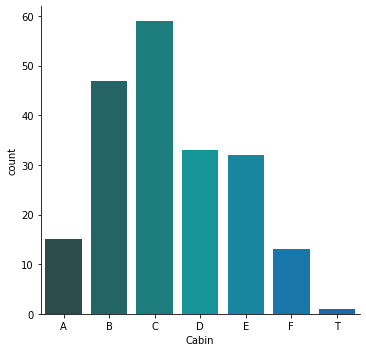

In [51]:
levels = [] #an empty list
for level in deck:
    levels.append(level[0])
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order=list('ABCDEFT'))

    

In [46]:
cabin_df.head()

,Cabin
0,C
1,C
2,E
3,G
4,C


We are getting T as a cabin as well which is not the case, which means the data is a bit corrupt, so we remove the T

In [52]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

In [53]:
cabin_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 203
Data columns (total 1 columns):
Cabin    203 non-null object
dtypes: object(1)
memory usage: 3.2+ KB


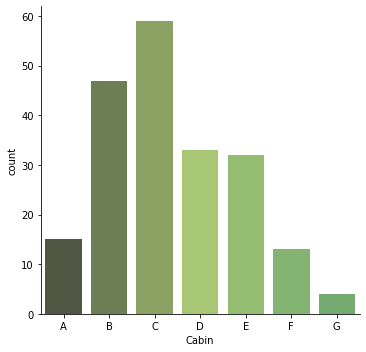

In [57]:
sns.catplot('Cabin',data=cabin_df,palette='summer_d',kind='count',order=list('ABCDEFG'))

In [58]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


# Question 3: 

Where the passengers comes from

While looking at the documentation over the Kaggel, the column "Embark" represent the town/cities where the person
belongs

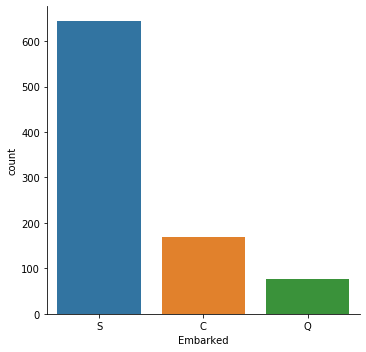

In [59]:
sns.catplot('Embarked',data=titanic_dframe,kind='count')

In [60]:
# This shows that most of the people come from the S town/city
# Lets see from where they embarked, and on which class they belong

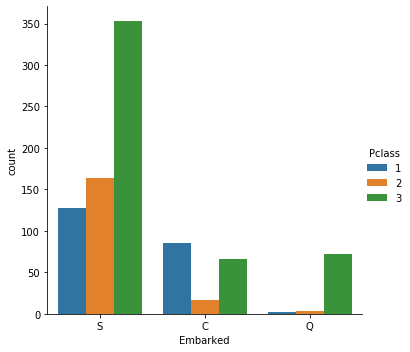

In [61]:
sns.catplot('Embarked',data=titanic_dframe,kind='count',hue='Pclass')

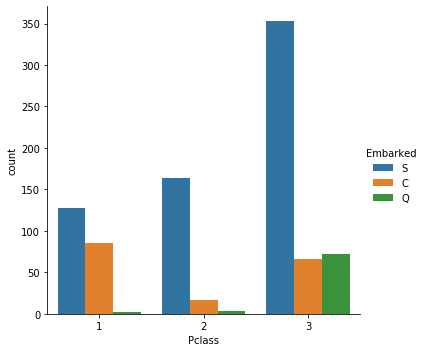

In [62]:
sns.catplot('Pclass',data=titanic_dframe,kind='count',hue='Embarked')

Based on the above analysis, that most of the people from the Q town are on third class. We can say that its
a kind of cheap town.

# Lets answer the fourth question
Who is alone and who is with the family

In [63]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


From kaggel we find that Sibsp represents the sibling and Parch represent the parent child on the board

In [64]:
titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [65]:
# See here that Sibsp and Parch both have all the non-null entries. So we dont have to remove the null values
# Lets make another column in which we gonna say that whether they have family or not

In [67]:
def family_yes_no(passenger):
    SibSp,Parch, = passenger
    if SibSp > 0 or Parch > 0:
        return 'Yes'
    else:
        return 'No'

In [68]:
titanic_dframe['Family']=titanic_dframe[['SibSp','Parch']].apply(family_yes_no,axis=1)

In [70]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No


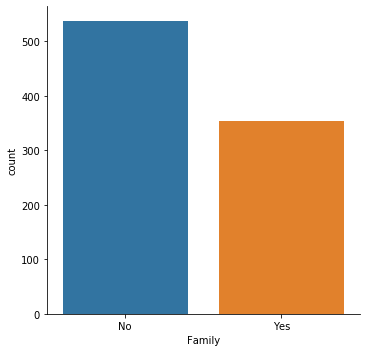

In [76]:
sns.catplot('Family',data=titanic_dframe,kind='count',order=['No','Yes'])

In [73]:
# Another interesting question would be how many males and females have families

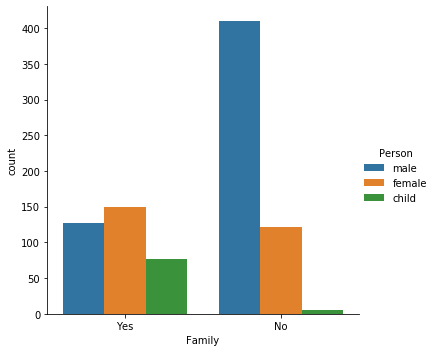

In [74]:
sns.catplot('Family',data=titanic_dframe,kind='count',hue='Person')

In [75]:
# It looks like that the mostly the males are without family

# Lets have a look at the survivors

In [77]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No


In [78]:
# Again from Kaggel we know that the column "Survived" represents the survivors

In [79]:
titanic_dframe['Survived'].sum()

342

In [81]:
titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Person         891 non-null object
Family         891 non-null object
dtypes: float64(2), int64(5), object(7)
memory usage: 97.5+ KB


In [82]:
#We don't have any null entry for survived, so we dont have to worry about changing the values

In [83]:
#Lets add new column to show wether they survived or not, although we have the same data already, Just for the 
#sake better understanding of manipulations. This time I am not going to use the loop or function, will try to do it
#with basic array functions

In [84]:
titanic_dframe['Survivor'] = titanic_dframe['Survived']

In [85]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Yes,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Yes,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Yes,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No,0


In [91]:
titanic_dframe['Survivor'].loc[titanic_dframe['Survived'] ==0] = 'No'

/Users/ahsanali/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [92]:
titanic_dframe['Survivor'].loc[titanic_dframe['Survived'] !=0] = 'Yes'

In [93]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Yes,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Yes,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Yes,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No,No


In [94]:
#The work done in 92 and 93 can also be done in the following way
titanic_dframe['Survivor2'] = titanic_dframe.Survived.map({0:'No',1:'Yes'})

In [95]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Family,Survivor,Survivor2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,Yes,No,No
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,Yes,Yes,Yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,No,Yes,Yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,Yes,Yes,Yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,No,No,No


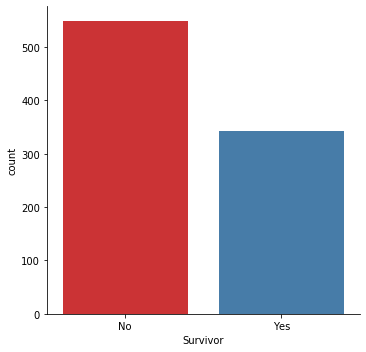

In [98]:
sns.catplot('Survivor',data=titanic_dframe,palette='Set1',kind='count')

In [99]:
# Lets have a look at male vs female survivors

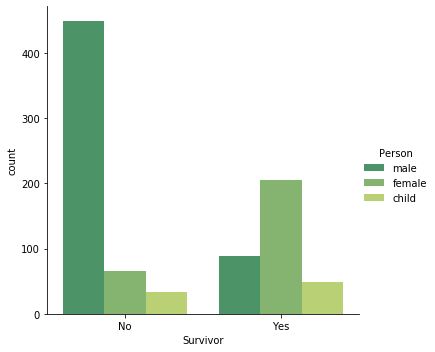

In [100]:
sns.catplot('Survivor',data=titanic_dframe,palette='summer',kind='count',hue='Person')

In [101]:
# Most of the females were survivors

In [102]:
# Lets look at the class 

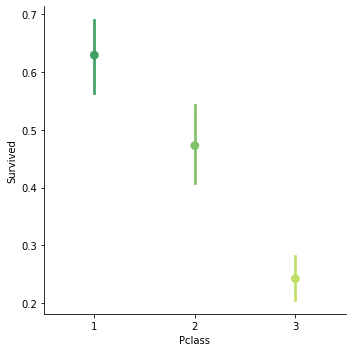

In [110]:
sns.catplot('Pclass','Survived',data=titanic_dframe,palette='summer',kind='point')

In [111]:
#First class survived the most, 


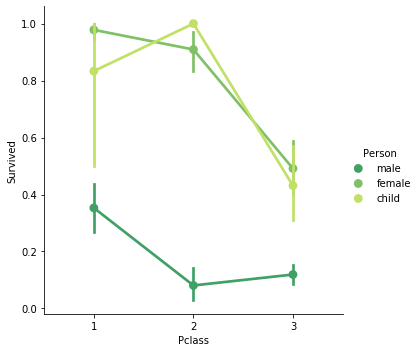

In [112]:
sns.catplot('Pclass','Survived',data=titanic_dframe,palette='summer',kind='point',hue='Person')

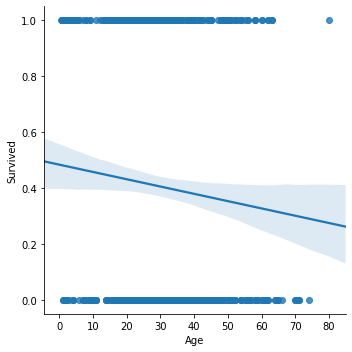

In [113]:
sns.lmplot('Age','Survived',data=titanic_dframe)

In [114]:
#The line represents that with increasing age, the survival rate gets lower

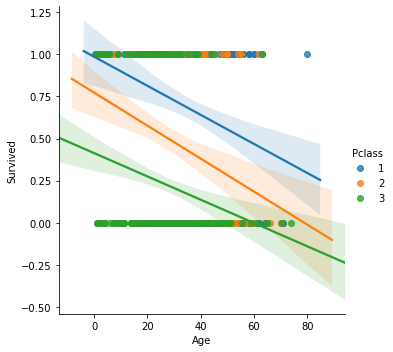

In [115]:
sns.lmplot('Age','Survived',data=titanic_dframe,hue='Pclass')

In [116]:
generations = np.arange(10,80,10)

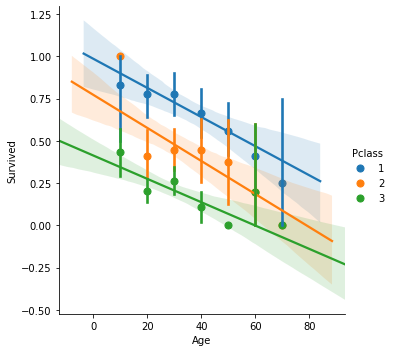

In [117]:
sns.lmplot('Age','Survived',data=titanic_dframe,hue='Pclass',x_bins=generations)

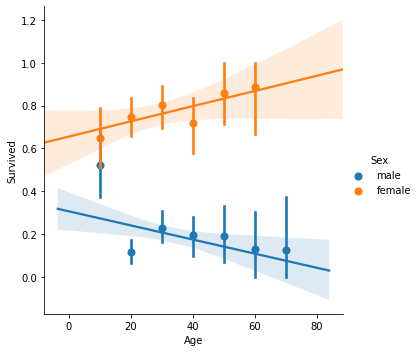

In [119]:
sns.lmplot('Age','Survived',data=titanic_dframe,hue='Sex',x_bins=generations)

In [120]:
# Did the Deck have an effect on survival rate

In [ ]:
# Male or female on the deck 
# Did having a family enable you to survive